In [94]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [95]:
dataset = pd.read_csv('student_por.csv')
print(dataset.shape)
print(dataset)

(649, 33)
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Wa

In [74]:
# Filtrar os dados pelo absenteísmo dos alunos.
absenteismo = dataset[dataset['absences'] == 0]
print(absenteismo.shape)


(244, 33)


In [86]:
# Calcular as medidas de centralidade da nota do primeiro período.
media_final = absenteismo['G1']
media = np.mean(media_final)
mediana = np.median(media_final)
quartis = np.quantile(media_final, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(media_final, ddof=1)
variancia = np.var(media_final, ddof=1)
print(f"Média: {media:.2f}")
print(f"Médiana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")


Média: 11.89
Médiana: 12.00
Quartis: [ 4. 10. 12. 14. 19.]
Desvio Padrão: 2.88
Variância: 8.32


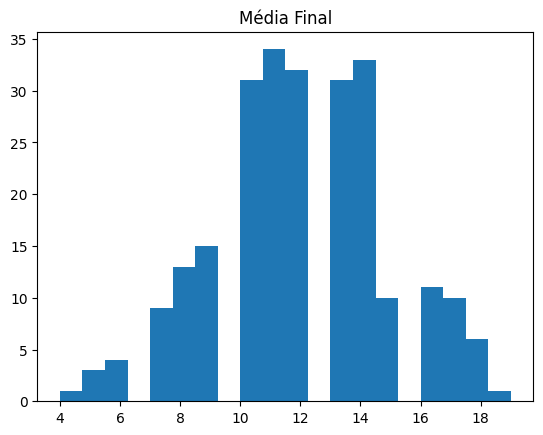

In [87]:
# Teste de Normalidade - Histograma
plt.hist(media_final, bins=20)
plt.title('Média Final')
plt.show()

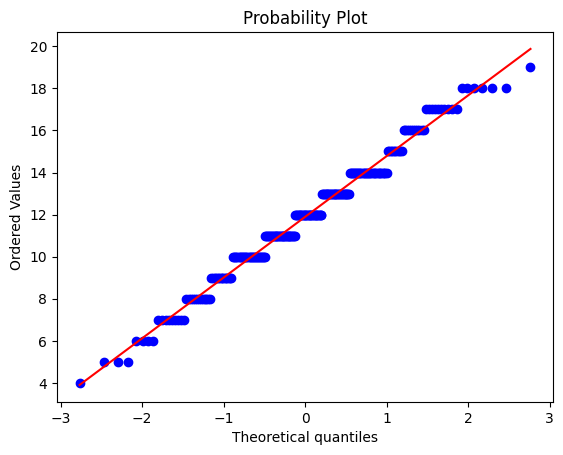

In [88]:
# Teste de Normalidade
# Geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(media_final, fit=True, plot=ax)
plt.show()

In [89]:
# Teste de Normailidade - Teste de Shapiro-Wilk

# Segundo o argumento de Shapiro-Wilk, se o valor de p > 0.01, não há como rejeitar a hipótese nula, e os dados são considerados como distribuídos normalmente. O valor de p pode varia de 0.01 até 0.05, de acordo com o rigor aplicado aos dados. Usar p >= 0.01 significa dizer que a amostra está muito estratificada, fortemente influenciada por fatores sociais, o que, nestes casos, deve-se fazer um tratamento dos mesmo por estratificação da amostra, para maior representatividade. No entanto, mesmo assim, o conjunto dos dados é mais significativo que a estratificação em si.
stats.shapiro(media_final)

ShapiroResult(statistic=np.float64(0.9852252416058717), pvalue=np.float64(0.012516995029837033))

In [90]:
# A constatação, pelo teste de Shapiro-Wilk, na análise dos dados num gráfico de historgrama e do Gráfico Q-Q plot, verifica que a distribuição da média da primeira avaliação, dos alunos que não faltaram as aulas, estão normalmente distribuídos.

In [91]:
# qual a probabilidade de um aluno, escolhido ao acaso, ter média maior ou igual à 14.
print(f"{norm.sf(14, media, desvio_padrao) * 100:.2f}%")

23.22%


In [92]:
# qual a probabilidade de um aluno, escolhido ao acaso, ter média menor ou igual à 12.
print(f"{norm.cdf(12, media, desvio_padrao) * 100:.2f}%")

51.53%


In [93]:
# qual a probabilidade de um aluno, escolhido ao acaso, ter média maior ou igual à 16.
print(f"{norm.sf(16, media, desvio_padrao) * 100:.2f}%")

7.71%
